# Important stuff

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Review criteria

**Clarity**

- The clear step-by-step instruction on how to produce the final submit file is provided

- Code has comments where it is needed and meaningful function names

**Feature preprocessing and generation with respect to models**

- Several simple features are generated

- For non-tree-based models preprocessing is used or the absence of it is explained

**Feature extraction from text and images**

- Features from text are extracted

- Special preprocessings for text are utilized (TF-IDF, stemming, levenshtening...)

**EDA**

- Several interesting observations about data are discovered and explained

- Target distribution is visualized, time trend is assessed

**Validation**

- Type of train/test split is identified and used for validation

- Type of public/private split is identified

**Data leakages**

- Data is investigated for data leakages and investigation process is described

- Found data leakages are utilized

**Metrics optimization**

- Correct metric is optimized

**Advanced Features I: mean encodings**

- Mean-encoding is applied

- Mean-encoding is set up correctly, i.e. KFold or expanding scheme are utilized correctly

**Advanced Features II**

- At least one feature from this topic is introduced

**Hyperparameter tuning**

- Parameters of models are roughly optimal

**Ensembles**

- Ensembling is utilized (linear combination counts)

- Validation with ensembling scheme is set up correctly, i.e. KFold or Holdout is utilized

- Models from different classes are utilized (at least two from the following: KNN, linear models, RF, GBDT, NN)

# Data Work

## Main Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dest = '/content/drive/MyDrive/HSE Final Project/Data/'

df_train = pd.read_csv(dest + 'sales_train.csv')
df_test = pd.read_csv(dest + 'test.csv')

In [4]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
df_test.shape

(214200, 3)

## Additional Data

In [7]:
df_shops = pd.read_csv(dest + 'shops.csv')
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
df_shops.shop_name.unique()

array(['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран',
       'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"',
       'Волжский ТЦ "Волга Молл"', 'Вологда ТРЦ "Мармелад"',
       'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Выездная Торговля',
       'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
       'Интернет-магазин ЧС', 'Казань ТЦ "Бехетле"',
       'Казань ТЦ "ПаркХаус" II', 'Калуга ТРЦ "XXI век"',
       'Коломна ТЦ "Рио"', 'Красноярск ТЦ "Взлетка Плаза"',
       'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"',
       'Москва "Распродажа"', 'Москва МТРЦ "Афи Молл"',
       'Москва Магазин С21', 'Москва ТК "Буденовский" (пав.А2)',
       'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"',
       'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"',
       'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТЦ "Новый век" (Новокосино)', 'Москва ТЦ "Перловский"',
       'Москва Т

In [9]:
df_shops['city'] = [split[0] for split in df_shops['shop_name'].str.split()]
df_shops['shop_type'] = [split[1] for split in df_shops['shop_name'].str.split()]
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [10]:
df_shops.shop_type.unique()

array(['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ', '(Плехановская,', 'Торговля',
       'ул.', 'ЧС', '"Распродажа"', 'МТРЦ', 'Магазин', 'ТК', 'Посад',
       'склад'], dtype=object)

In [11]:
mask = (df_shops.shop_type != 'ТЦ') & \
        (df_shops.shop_type != 'ТРК') & \
        (df_shops.shop_type != 'ТРЦ') & \
        (df_shops.shop_type != 'МТРЦ') & \
        (df_shops.shop_type != 'ТК')

# mask = df_shops.shop_type not in ['ТЦ', 'ТРК', 'ТРЦ', 'МТРЦ', 'ТК']

df_shops.loc[mask, 'shop_type'] = 'ТЦ'
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,ТЦ
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [12]:
import string

df_shops['city'] = df_shops.city.str.translate(str.maketrans('', '', string.punctuation))
df_shops.head()

,shop_name,shop_id,city,shop_type
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,ТЦ
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [13]:
len(df_shops.city.unique())

31

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = encoder.fit_transform(df_shops.city.values.reshape(-1,1))

# add this back into the original dataframe 
encoded = pd.DataFrame(X, columns=["city_enc"]) 
df_shops = pd.concat([df_shops, encoded], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# drop the city column and city_0 to avoid so called "Dummy Variable Trap"
df_shops = df_shops.drop(['city'], axis=1) 
df_shops.head()

,shop_name,shop_id,shop_type,city_enc
0,"!Якутск Орджоникидзе, 56 фран",0,ТЦ,29
1,"!Якутск ТЦ ""Центральный"" фран",1,ТЦ,29
2,"Адыгея ТЦ ""Мега""",2,ТЦ,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,ТРК,1
4,"Волжский ТЦ ""Волга Молл""",4,ТЦ,2


The same for shop_type

In [16]:
encoder = LabelEncoder()
X = encoder.fit_transform(df_shops.shop_type.values.reshape(-1,1))

encoded = pd.DataFrame(X, columns=["shop_type_enc"]) 
df_shops = pd.concat([df_shops, encoded], axis=1)

df_shops = df_shops.drop(['shop_type'], axis=1) 
df_shops.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,shop_name,shop_id,city_enc,shop_type_enc
0,"!Якутск Орджоникидзе, 56 фран",0,29,4
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4
2,"Адыгея ТЦ ""Мега""",2,0,4
3,"Балашиха ТРК ""Октябрь-Киномир""",3,1,2
4,"Волжский ТЦ ""Волга Молл""",4,2,4


In [17]:
df_shops.drop(['shop_name'], axis=1, inplace=True)
# df_shops.astype('int')
df_shops.head()

,shop_id,city_enc,shop_type_enc
0,0,29,4
1,1,29,4
2,2,0,4
3,3,1,2
4,4,2,4


In [18]:
df_categories = pd.read_csv(dest + 'item_categories.csv')
df_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


## Analysis for train

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [20]:
df_train['date'] =  pd.to_datetime(df_train['date'], format='%d.%m.%Y')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [21]:
df_train['year'] = df_train.date.dt.year
# df_train['month'] = df_train.date.dt.month
# df_train['day'] = df_train.date.dt.day
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
0,2013-01-02,0,59,22154,999.00,1.0,2013
1,2013-01-03,0,25,2552,899.00,1.0,2013
2,2013-01-05,0,25,2552,899.00,-1.0,2013
3,2013-01-06,0,25,2554,1709.05,1.0,2013
4,2013-01-15,0,25,2555,1099.00,1.0,2013


In [22]:
df_train.drop('date', axis=1, inplace=True)
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
0,0,59,22154,999.00,1.0,2013
1,0,25,2552,899.00,1.0,2013
2,0,25,2552,899.00,-1.0,2013
3,0,25,2554,1709.05,1.0,2013
4,0,25,2555,1099.00,1.0,2013


In [23]:
print('Last date block num - ', df_train.date_block_num.max())
print('Years: ', df_train.year.unique())

Last date block num -  33
Years:  [2013 2014 2015]


[]

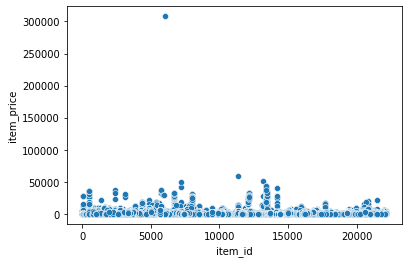

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='item_id', y='item_price', data=df_train)
plt.plot()

In [25]:
# sns.scatterplot(x='item_id',
#                 y='item_price',
#                 data=df_train,
#                 hue='date_block_num')
# plt.plot()

## Main

In [26]:
from itertools import product
index_cols = ['shop_id','item_id','year','date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in df_train['date_block_num'].unique():
    cur_shops = df_train[df_train['date_block_num'] == block_num]['shop_id'].unique()
    cur_items = df_train[df_train['date_block_num'] == block_num]['item_id'].unique()
    cur_years = df_train[df_train['date_block_num'] == block_num]['year'].unique()
    grid.append(np.array(list(product(*[cur_shops,cur_items,cur_years,[block_num]])),
                         dtype='int32'))

# Turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns=index_cols, dtype=np.int32)

In [27]:
# Get aggregated values for (shop_id, item_id, month, year)
gb = df_train.groupby(index_cols, as_index=False)['item_cnt_day'].agg('sum')
# Fix column names
# gb.columns = [col[0] if col[-1] == '' else col[-1] for col in gb.columns.values]
print(gb)

         shop_id  item_id  year  date_block_num  item_cnt_day
0              0       30  2013               1          31.0
1              0       31  2013               1          11.0
2              0       32  2013               0           6.0
3              0       32  2013               1          10.0
4              0       33  2013               0           3.0
...          ...      ...   ...             ...           ...
1609119       59    22164  2015              27           2.0
1609120       59    22164  2015              30           1.0
1609121       59    22167  2013               9           1.0
1609122       59    22167  2013              11           2.0
1609123       59    22167  2014              17           1.0

[1609124 rows x 5 columns]


In [28]:
# Join aggregated data to the grid
df = pd.merge(grid, gb, how='left', on=index_cols).fillna(0)
# Sort the data
df.sort_values(['year','date_block_num','shop_id','item_id'], inplace=True)

In [29]:
df.head()

,shop_id,item_id,year,date_block_num,item_cnt_day
139255,0,19,2013,0,0.0
141495,0,27,2013,0,0.0
144968,0,28,2013,0,0.0
142661,0,29,2013,0,0.0
138947,0,32,2013,0,6.0


In [30]:
prices = df_train.groupby('item_id')['item_price'].max()

In [31]:
df['item_price'] = df['item_id'].map(prices)
df.head()

,shop_id,item_id,year,date_block_num,item_cnt_day,item_price
139255,0,19,2013,0,0.0,28.0
141495,0,27,2013,0,0.0,2499.0
144968,0,28,2013,0,0.0,549.0
142661,0,29,2013,0,0.0,2499.0
138947,0,32,2013,0,6.0,349.0


In [32]:
cols = ['shop_id', 'item_id', 'date_block_num', 'item_cnt_day']

prev_val_benchmark = df.loc[:, cols]
prev_val_benchmark.date_block_num += 1
prev_val_benchmark.rename(columns={'item_cnt_day': 'prev_value'}, inplace=True)
prev_val_benchmark.head()

,shop_id,item_id,date_block_num,prev_value
139255,0,19,1,0.0
141495,0,27,1,0.0
144968,0,28,1,0.0
142661,0,29,1,0.0
138947,0,32,1,6.0


In [33]:
max_block_num = prev_val_benchmark.date_block_num.max()
next_val = prev_val_benchmark[prev_val_benchmark.date_block_num == max_block_num].prev_value.values

In [34]:
df = pd.merge(df, prev_val_benchmark,
              how='left', on=cols[:-1])
df.tail()

,shop_id,item_id,year,date_block_num,item_cnt_day,item_price,prev_value
10913845,59,22162,2015,33,0.0,399.0,0.0
10913846,59,22163,2015,33,0.0,169.0,0.0
10913847,59,22164,2015,33,0.0,749.0,0.0
10913848,59,22166,2015,33,0.0,150.0,0.0
10913849,59,22167,2015,33,0.0,299.0,0.0


In [35]:
df.prev_value.describe()

count    8.437839e+06
mean     4.085508e-01
std      3.604813e+00
min     -2.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.305000e+03
Name: prev_value, dtype: float64

In [36]:
df['prev_value'] = df.prev_value.fillna(0)
df.head()

,shop_id,item_id,year,date_block_num,item_cnt_day,item_price,prev_value
0,0,19,2013,0,0.0,28.0,0.0
1,0,27,2013,0,0.0,2499.0,0.0
2,0,28,2013,0,0.0,549.0,0.0
3,0,29,2013,0,0.0,2499.0,0.0
4,0,32,2013,0,6.0,349.0,0.0


In [37]:
df = pd.merge(df, df_shops,
              how='left', on='shop_id')
df.head()

,shop_id,item_id,year,date_block_num,item_cnt_day,item_price,prev_value,city_enc,shop_type_enc
0,0,19,2013,0,0.0,28.0,0.0,29,4
1,0,27,2013,0,0.0,2499.0,0.0,29,4
2,0,28,2013,0,0.0,549.0,0.0,29,4
3,0,29,2013,0,0.0,2499.0,0.0,29,4
4,0,32,2013,0,6.0,349.0,0.0,29,4


In [38]:
# import seaborn as sns
# sns.pairplot(df)

In [39]:
dest = '/content/drive/MyDrive/HSE Final Project/to_train'
df.to_csv(dest + '/submit_2_abandoned.csv', index=False)

# Test Submission to kaggle

In [40]:
test_dest = '/content/drive/MyDrive/HSE Final Project/Data/test.csv'
test_df = pd.read_csv(test_dest)
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [41]:
test_features = test_df.drop('ID', axis=1)
test_features['year'] = 2015
test_features['date_block_num'] = 34

prices = df_train.groupby('item_id')['item_price'].max()
test_features['item_price'] = test_features['item_id'].map(prices).fillna(-1)
test_features = pd.merge(test_features, prev_val_benchmark,
                         how='left', on=cols[:-1]).fillna(0)

test_features = pd.merge(test_features, df_shops,
                         how='left', on='shop_id')
print(test_features.head())

   shop_id  item_id  year  ...  prev_value  city_enc  shop_type_enc
0        5     5037  2015  ...         0.0         3              3
1        5     5320  2015  ...         0.0         3              3
2        5     5233  2015  ...         1.0         3              3
3        5     5232  2015  ...         0.0         3              3
4        5     5268  2015  ...         0.0         3              3

[5 rows x 8 columns]


In [44]:
dest = '/content/drive/MyDrive/HSE Final Project/to_test'
name = 'submit_2_test.csv'
test_features.to_csv(dest + '/' + name, index=False)